In [5]:
from typing import List
import heapq
import random as rand
import pandas as pd



class Process:
    def __init__(self, id: int, burst_time: int, priority: int, arr_time: int , waiting_time : int = 0, cpu_time_acquired : int  = 0, turnaround_time : int = 0) -> None:
        
        self.id = id
        self.burst_time = burst_time
        self.priority = priority
        self.arrival_time = arr_time

        # waiting time is the time between submission to system and starting execution 
        self.waiting_time = waiting_time
        self.cpu_time_acquired = cpu_time_acquired
        self.turnaround_time = turnaround_time


    

    @staticmethod
    def generate_processes(file_name :str, number_of_processes : int ,  max_burst :int , min_burst:int, max_arrival_time:int) -> []:
        file = open(file_name, 'w')
        file.write("id,burst_time,priority,arrival_time,turnaround_time,cpu_time_acquired,waiting_time" + '\n')
        processes = []
        for i in range(number_of_processes):
            
            id = i+1
            priority = rand.randint(-20, 19)
            burst_time = rand.randint(min_burst, max_burst)
            arrival_time = rand.randint(0,max_arrival_time)
            
            process = Process(id, burst_time, priority, arrival_time)
            processes.append(process)
            file.write(str(process) + '\n')

        file.close()
            
        return processes
    
    @staticmethod
    def load_from_csv(file_name : str) -> []:
        processes =  []
        df = pd.read_csv(file_name)
        for _,row in df.iterrows() :
            process = Process(row["id"], row["burst_time"],row["priority"], row["arrival_time"], row["turnaround_time"] , row["cpu_time_acquired"], row["waiting_time"])
            processes.append(process)

        return processes
    

    @staticmethod 
    def save_processes_csv(file_name : str , processes : []) -> None :
        file = open(file_name , 'w')
        file.write("id,burst_time,priority,arrival_time,turnaround_time,cpu_time_acquired,waiting_time" + '\n')
        for process in processes : 
            file.write(str(process) + '\n')
        

    def __lt__(self, other):
        if self.priority != other.priority:
            return self.priority < other.priority
        else:
            return self.id < other.id


    def __str__(self):
        return str(self.id) + ',' + str(self.burst_time) + ',' + str(self.priority) + ',' + str(self.arrival_time) + ',' + str(self.turnaround_time) + ',' + str(self.cpu_time_acquired) +',' + str(self.waiting_time)
    

    def display(self):
        return f"Process {self.id} with burst time {self.burst_time} and priority {self.priority} and arrival time {self.arrival_time} and waiting time {self.waiting_time} and turnaround time {self.turnaround_time}"



list_of_processes = [Process(1, 10, 2, 0), Process(2, 5, 1, 2), Process(3, 8, 3, 3), Process(4, 6, 4, 4), Process(5, 7, 1, 5), Process(6, 3, 2, 6)]


In [6]:
from collections import deque

# Round robin Algorithm
def Round_Robin(Processes: List[Process], quantum: int, context_switching_time: int):
    

    Processes.sort(key=lambda x: x.arrival_time)

    current_time = Processes[0].arrival_time
    finished_processes = 0

    queue = deque()


    # current_process_idx is the index of the next process that will arrive
    current_process_idx = 0


    while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
        queue.append(Processes[current_process_idx])
        current_process_idx += 1

    prev = -1

    while finished_processes < len(Processes):

        # first we do a context switch 
        

        # we pick the first process in the queue and execute it for the quantum time
        # if the process finishes before the quantum time we will update the current time and the process

        if queue:
            process = queue.popleft()

            if prev == -1:
                prev = process.id

            if context_switching_time != 0 and prev != process.id:
                current_time += context_switching_time

            # set the waiting time of the process
            if process.cpu_time_acquired == 0:
                process.waiting_time = current_time - process.arrival_time

            #print("runnnig process", process.id)
            if process.burst_time - process.cpu_time_acquired <= quantum:
                process.cpu_time_acquired = process.burst_time
                current_time += process.burst_time - process.cpu_time_acquired
                process.turnaround_time = current_time - process.arrival_time
                finished_processes += 1

                while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
                    queue.append(Processes[current_process_idx])
                    current_process_idx += 1

                
            
            else:
                process.cpu_time_acquired += quantum
                current_time += quantum

                while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
                    queue.append(Processes[current_process_idx])
                    current_process_idx += 1
                
                queue.append(process)

                
        else:
            current_time = Processes[current_process_idx].arrival_time

            while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
                    queue.append(Processes[current_process_idx])
                    current_process_idx += 1

        
    Processes.sort(key=lambda x: x.id)
    return Processes, current_time

## Benchmark testing

In [11]:
import time
import numpy as np

In [65]:
# in this first test we will see the effect of the quantum time on the algorithm run time


min_burst = 1
max_burst = 20
max_arrival_time = 100
nb_processes = 1000
context_switching_time = 0

In [74]:



# now we will generate the quantums with 0.1 increments
quantums = np.arange(0.1, 10.1, 0.1)

In [84]:
number_of_runs = 100
results = [0] * len(quantums)

for j in range(number_of_runs):
    processes = Process.generate_processes("processes.csv", nb_processes, max_burst, min_burst, max_arrival_time)
    for i in range(len(quantums)):
        processes = Process.load_from_csv("processes.csv")
        start = time.time()
        _, time_taken = Round_Robin(processes, quantums[i], context_switching_time)
        end = time.time()
        results[i] += (end - start)
    print("Run number ", j)

Run number  0
Run number  1
Run number  2
Run number  3
Run number  4
Run number  5
Run number  6
Run number  7
Run number  8
Run number  9
Run number  10
Run number  11
Run number  12
Run number  13
Run number  14
Run number  15
Run number  16
Run number  17
Run number  18
Run number  19
Run number  20
Run number  21
Run number  22
Run number  23
Run number  24
Run number  25
Run number  26
Run number  27
Run number  28
Run number  29
Run number  30
Run number  31
Run number  32
Run number  33
Run number  34
Run number  35
Run number  36
Run number  37
Run number  38
Run number  39
Run number  40
Run number  41
Run number  42
Run number  43
Run number  44
Run number  45
Run number  46
Run number  47
Run number  48
Run number  49
Run number  50
Run number  51
Run number  52
Run number  53
Run number  54
Run number  55
Run number  56
Run number  57
Run number  58
Run number  59
Run number  60
Run number  61
Run number  62
Run number  63
Run number  64
Run number  65
Run number  66
Run n

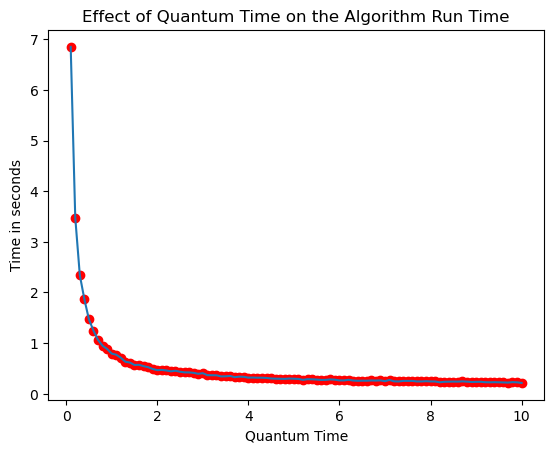

In [87]:
# we will now plot the results to see the effect of the quantum time on the algorithm run time
import matplotlib.pyplot as plt

# we will add dots on remarkable points
plt.scatter(quantums, results, color='red')

plt.plot(quantums, results)
plt.xlabel("Quantum Time")
plt.ylabel("Time in seconds")
plt.title("Effect of Quantum Time on the Algorithm Run Time")
plt.show()


## Effect of the number of processes

In [102]:
min_burst = 1
max_burst = 20
max_arrival_time = 100
context_switching_time = 0
quantum = 5

In [103]:
number_of_processes = range(10, 100000, 100)


In [104]:
results = [0] * len(number_of_processes)

for i in range(len(number_of_processes)):
    processes = Process.generate_processes("processes.csv", number_of_processes[i], max_burst, min_burst, max_arrival_time)

    start = time.time()
    _, time_taken = Round_Robin(processes, quantum, context_switching_time)
    end = time.time()
    results[i] += (end - start)

    print("Done")
    


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


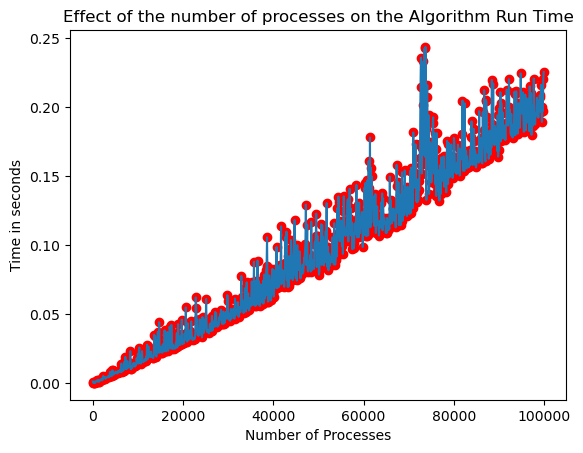

In [108]:
# we will now plot the results to see the effect of the quantum time on the algorithm run time
import matplotlib.pyplot as plt

# we will add dots on remarkable points
plt.scatter(number_of_processes, results, color='red')

plt.plot(number_of_processes, results)
plt.xlabel("Number of Processes")
plt.ylabel("Time in seconds")
plt.title("Effect of the number of processes on the Algorithm Run Time")
plt.show()


In [109]:
# we will store the results in a csv file
df = pd.DataFrame({"Number of Processes": number_of_processes, "Time Taken": results})
df.to_csv("Number_of_processes.csv", index=False)

## Effect of the burst time

In [36]:
max_arrival_time = 0
context_switching_time = 0
quantum = 1
nb_processes = 100

In [37]:
burst_time = range(1, 2000)

In [38]:
results = [0] * len(burst_time)

for i in range(len(burst_time)):
    processes = Process.generate_processes("processes.csv", nb_processes, burst_time[i], burst_time[i], max_arrival_time)

    start = time.time()
    _, time_taken = Round_Robin(processes, quantum, context_switching_time)
    end = time.time()
    results[i] += (end - start)

    if i % 100 == 0:
        print("Done")
    


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [39]:
results

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009987354278564453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009999275207519531,
 0.0,
 0.0009932518005371094,
 0.0,
 0.0009999275207519531,
 0.0010042190551757812,
 0.0009911060333251953,
 0.0009992122650146484,
 0.0010004043579101562,
 0.0009963512420654297,
 0.00099945068359375,
 0.0,
 0.0009989738464355469,
 0.0010006427764892578,
 0.0,
 0.0009884834289550781,
 0.0009992122650146484,
 0.0,
 0.001004934310913086,
 0.0009963512420654297,
 0.0009999275207519531,
 0.00099945068359375,
 0.0009980201721191406,
 0.0,
 0.0009913444519042969,
 0.00099945068359375,
 0.0010013580322265625,
 0.0009915828704833984,
 0.001004934310913086,
 0.0019979476928710938,
 0.001993894577026367,
 0.0020208358764648438,
 0.0010085105895996094,
 0.002006053924560547,
 0.002004384994506836,
 0.0020003318786621094,
 0.0010063648223876953,
 0.0015099048614501953,
 0.0030035972595214844,
 0.002004861831665039,
 0.0020046234130859375,
 0.0010023117065429688,
 0.002003908157348633,
 0.00

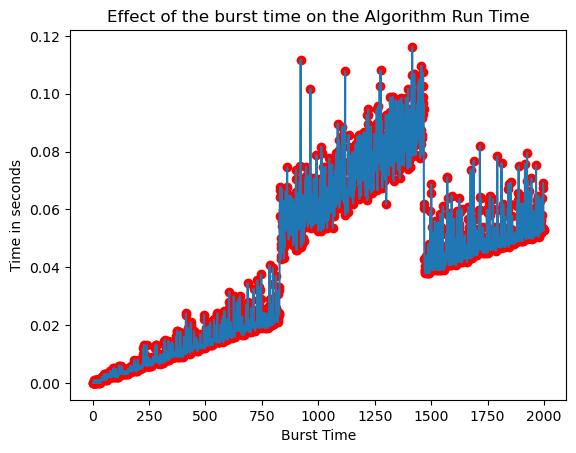

In [40]:
# we will now plot the results to see the effect of the quantum time on the algorithm run time
import matplotlib.pyplot as plt

# we will add dots on remarkable points
plt.scatter(burst_time, results, color='red')

plt.plot(burst_time, results)
plt.xlabel("Burst Time")
plt.ylabel("Time in seconds")
plt.title("Effect of the burst time on the Algorithm Run Time")
plt.show()


In [31]:
# storing the results in a csv file
df = pd.DataFrame({"Burst Time": burst_time, "Time Taken": results})
df.to_csv("Burst_time.csv", index=False)


# Benchmark test in general

### Effect of the context switching time

In [83]:
max_arrival_time = 0

max_burst = 20
min_burst = 1

quantum = 1
nb_processes = 100

In [84]:
context_switching_time = range(0, 10)

In [85]:
results = [0] * len(context_switching_time)

processes = Process.generate_processes("processes.csv", nb_processes, max_burst, min_burst, max_arrival_time)
for i in range(len(context_switching_time)):
    

    processes = Process.load_from_csv("processes.csv")
    _, time_taken = Round_Robin(processes, quantum, context_switching_time[i])
    results[i] = time_taken

    if i % 100 == 0:
        print("Done")
    


Done


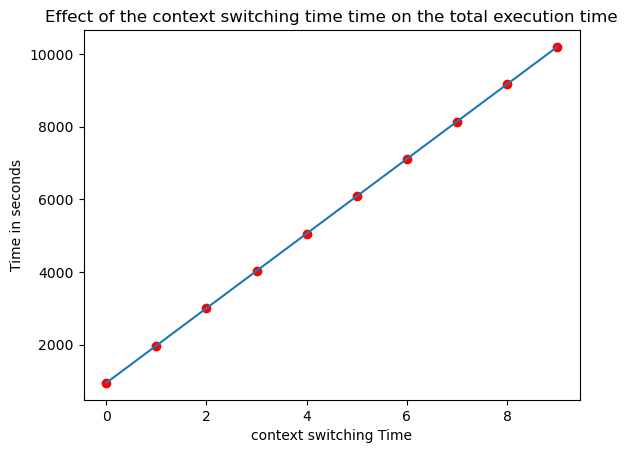

In [86]:
# we will now plot the results to see the effect of the quantum time on the algorithm run time
import matplotlib.pyplot as plt

# we will add dots on remarkable points
plt.scatter(context_switching_time, results, color='red')

plt.plot(context_switching_time, results)
plt.xlabel("context switching Time")
plt.ylabel("Time in seconds")
plt.title("Effect of the context switching time time on the total execution time")
plt.show()


### Effect of the burst time

In [74]:
max_arrival_time = 100
context_switching_time = 2
quantum = 1
nb_processes = 100

In [75]:
burst_test = range(1, 10)

In [78]:

results = [0] * len(burst_test)

for i in range(len(burst_test)):
    processes = Process.generate_processes("processes.csv", nb_processes, burst_test[i], burst_test[i], max_arrival_time)


    _, time_taken = Round_Robin(processes, quantum, context_switching_time)
    
    results[i]  = time_taken
    if i % 100 == 0:
        print("Done")

Done


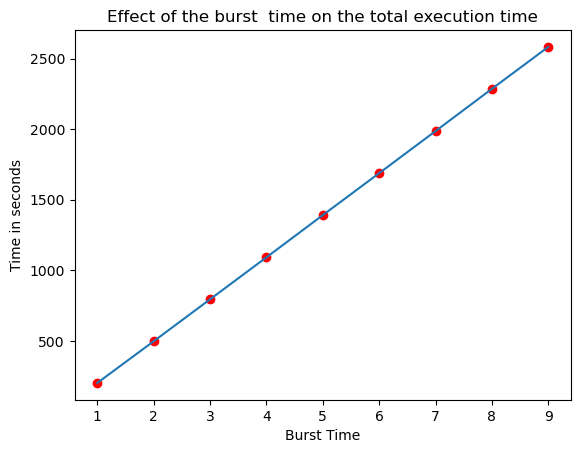

In [79]:
# we will now plot the results to see the effect of the quantum time on the algorithm run time
import matplotlib.pyplot as plt

# we will add dots on remarkable points
plt.scatter(burst_test, results, color='red')

plt.plot(burst_test, results)
plt.xlabel("Burst Time")
plt.ylabel("Time in seconds")
plt.title("Effect of the burst  time on the total execution time")
plt.show()
